# EOSC 410 Final Project
## Using CNNs and LSTMs
### Load in the streamwater data

In [1]:
import numpy as np
import pandas as pd

In [2]:
streamwater_data = pd.read_csv("data/streamflow_data/Final_Processed_Station_Data_Watershed.csv")
streamwater_data.dropna(inplace=True)
streamwater_data

C:\Users\tbwil\AppData\Local\Temp\ipykernel_25660\3925566811.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241) have mixed types. Specify dtype option on import or

,name,ADAMS RIVER NEAR SQUILAX,ALOUETTE RIVER NEAR HANEY,ANDERSON CREEK NEAR NELSON,ANSEDAGAN CREEK NEAR NEW AIYANSH,ARROW CREEK NEAR ERICKSON,ASH RIVER BELOW MORAN CREEK,ASHNOLA RIVER NEAR KEREMEOS,ATNARKO RIVER NEAR THE MOUTH,BABINE RIVER AT OUTLET OF NILKITKWA LAKE,...,VANCE CREEK BELOW DEAFIES CREEK,VASEUX CREEK ABOVE SOLCO CREEK,VERNON CREEK AT OUTLET OF KALAMALKA LAKE,WANNOCK RIVER AT OUTLET OF OWIKENO LAKE,WEST CREEK NEAR FORT LANGLEY,WEST KETTLE RIVER AT WESTBRIDGE,WEST KETTLE RIVER NEAR MCCULLOCH,WHITEMAN CREEK ABOVE BOULEAU CREEK,YALAKOM RIVER ABOVE ORE CREEK,ZEBALLOS RIVER AT MOOK PEAK
0,lat,50.93759,49.239,49.50195,55.12986,49.15912,49.36992,49.20763,52.36008,55.42654,...,50.28432,49.24928,50.23847,51.67917,49.14767,49.16981,49.70292,50.21222,50.91261,50.13569
1,lon,-119.65634,-122.57975,-117.26128,-129.35494,-116.45249,-124.98411,-119.99352,-126.00586,-126.69763,...,-118.94704,-119.32139,-119.26689,-127.17917,-122.53187,-118.97506,-119.09247,-119.53861,-122.23931,-126.82006
2,major_watershed,South Thompson River,Fraser River,Lower Kootenay River,Nass River,Lower Kootenay River,Vancouver Island (West) Rivers,Okanagan River,North Coast Rivers,Babine River,...,South Thompson River,Okanagan River,Okanagan River,North Coast Rivers,Fraser River,Kettle River,Kettle River,Okanagan River,Fraser River,Vancouver Island (West) Rivers
3,2011-01-01,21.10065052,3.950658369,0.026633333,0.175258698,0.49568895,12.29111538,1.690907985,-126.00586,15.4966629,...,0.067015878,0.083,0.075272787,99.95522759,0.072746181,1.596026005,0.401,0.04718573,1.238667116,0.176193638
4,2011-01-02,20.69611806,3.74086273,0.0249375,0.163091831,0.485078758,11.49209615,1.755803793,-120.3616256,15.25197908,...,0.067070577,0.081,0.07749122,94.00841842,0.052530297,1.552300933,0.392296896,0.047,1.195453978,0.147495593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,2019-12-27,28.35601763,3.805006418,0.035264969,0.206954232,0.32644878,12.9119907,2.653639316,15.6579357,40.92694928,...,0.152302505,0.132262499,0.931793229,90.35042853,0.185841803,2.48919843,0.589289725,0.044274653,2.09906261,0.692392271
3286,2019-12-28,28.01791851,3.672696601,0.03400306,0.19882236,0.315455665,12.30531204,2.619591235,15.62701205,41.03352373,...,0.150731594,0.133782507,0.933848909,85.67016027,0.162655089,2.476254645,0.653278906,0.041977431,2.175908629,2.119497424
3287,2019-12-29,27.64810612,3.562182615,0.032415759,0.208702174,0.308788651,12.85874418,2.581987854,15.34367393,40.16380521,...,0.150072704,0.137598129,0.930116518,86.62217877,0.148739875,2.477790057,0.671989393,0.043691667,2.16848825,1.645608303
3288,2019-12-30,27.34101117,3.890749246,0.031493239,0.231638281,0.304362167,13.69794892,2.549899999,15.09039204,40.01387482,...,0.148394006,0.141737156,0.931532967,87.42211774,0.185196466,2.520690667,0.682877324,0.049514583,2.115560141,1.983826578


In [3]:
station_lats = streamwater_data.iloc[0][1:]
station_lons = streamwater_data.iloc[1][1:]
watersheds = streamwater_data.iloc[2][1:]

# drop the first 3 rows
streamwater_data = streamwater_data.drop([0, 1, 2])
# drop the first column
streamwater_data = streamwater_data.drop(columns=["name"])
streamwater_data

,ADAMS RIVER NEAR SQUILAX,ALOUETTE RIVER NEAR HANEY,ANDERSON CREEK NEAR NELSON,ANSEDAGAN CREEK NEAR NEW AIYANSH,ARROW CREEK NEAR ERICKSON,ASH RIVER BELOW MORAN CREEK,ASHNOLA RIVER NEAR KEREMEOS,ATNARKO RIVER NEAR THE MOUTH,BABINE RIVER AT OUTLET OF NILKITKWA LAKE,BAKER CREEK AT QUESNEL,...,VANCE CREEK BELOW DEAFIES CREEK,VASEUX CREEK ABOVE SOLCO CREEK,VERNON CREEK AT OUTLET OF KALAMALKA LAKE,WANNOCK RIVER AT OUTLET OF OWIKENO LAKE,WEST CREEK NEAR FORT LANGLEY,WEST KETTLE RIVER AT WESTBRIDGE,WEST KETTLE RIVER NEAR MCCULLOCH,WHITEMAN CREEK ABOVE BOULEAU CREEK,YALAKOM RIVER ABOVE ORE CREEK,ZEBALLOS RIVER AT MOOK PEAK
3,21.10065052,3.950658369,0.026633333,0.175258698,0.49568895,12.29111538,1.690907985,-126.00586,15.4966629,0.779153314,...,0.067015878,0.083,0.075272787,99.95522759,0.072746181,1.596026005,0.401,0.04718573,1.238667116,0.176193638
4,20.69611806,3.74086273,0.0249375,0.163091831,0.485078758,11.49209615,1.755803793,-120.3616256,15.25197908,0.777871857,...,0.067070577,0.081,0.07749122,94.00841842,0.052530297,1.552300933,0.392296896,0.047,1.195453978,0.147495593
5,20.41219444,3.620702514,0.023570833,0.166408284,0.486131451,10.89227885,1.819792735,-114.7173912,15.24676794,0.772798248,...,0.067068786,0.079,0.079711087,87.54622424,0.036934418,1.541753419,0.383060452,0.061245829,1.150700696,0.136078302
6,20.20394097,3.528421344,0.024729167,0.178720242,0.498147361,10.45515385,1.879250556,-109.0731568,15.61665381,0.768036968,...,0.067029062,0.077,0.082849452,82.19820256,0.03522922,1.570496978,0.373180231,0.06697541,1.107009056,0.183736437
7,20.19361806,5.366123781,0.02485,0.188595334,0.509199711,11.02450962,1.930552369,-103.4289224,16.03490063,0.763594196,...,0.066954084,0.075,0.087452934,85.33382358,0.458727663,1.617610631,0.362545801,0.063745292,1.066980755,2.73458579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,28.35601763,3.805006418,0.035264969,0.206954232,0.32644878,12.9119907,2.653639316,15.6579357,40.92694928,2.58443689,...,0.152302505,0.132262499,0.931793229,90.35042853,0.185841803,2.48919843,0.589289725,0.044274653,2.09906261,0.692392271
3286,28.01791851,3.672696601,0.03400306,0.19882236,0.315455665,12.30531204,2.619591235,15.62701205,41.03352373,2.572821001,...,0.150731594,0.133782507,0.933848909,85.67016027,0.162655089,2.476254645,0.653278906,0.041977431,2.175908629,2.119497424
3287,27.64810612,3.562182615,0.032415759,0.208702174,0.308788651,12.85874418,2.581987854,15.34367393,40.16380521,2.595999797,...,0.150072704,0.137598129,0.930116518,86.62217877,0.148739875,2.477790057,0.671989393,0.043691667,2.16848825,1.645608303
3288,27.34101117,3.890749246,0.031493239,0.231638281,0.304362167,13.69794892,2.549899999,15.09039204,40.01387482,2.798730865,...,0.148394006,0.141737156,0.931532967,87.42211774,0.185196466,2.520690667,0.682877324,0.049514583,2.115560141,1.983826578


In [4]:
# normalize the streamwater data by station
streamwater_data = streamwater_data.astype(float)
streamwater_data = (streamwater_data - streamwater_data.mean()) / streamwater_data.std()
streamwater_data

,ADAMS RIVER NEAR SQUILAX,ALOUETTE RIVER NEAR HANEY,ANDERSON CREEK NEAR NELSON,ANSEDAGAN CREEK NEAR NEW AIYANSH,ARROW CREEK NEAR ERICKSON,ASH RIVER BELOW MORAN CREEK,ASHNOLA RIVER NEAR KEREMEOS,ATNARKO RIVER NEAR THE MOUTH,BABINE RIVER AT OUTLET OF NILKITKWA LAKE,BAKER CREEK AT QUESNEL,...,VANCE CREEK BELOW DEAFIES CREEK,VASEUX CREEK ABOVE SOLCO CREEK,VERNON CREEK AT OUTLET OF KALAMALKA LAKE,WANNOCK RIVER AT OUTLET OF OWIKENO LAKE,WEST CREEK NEAR FORT LANGLEY,WEST KETTLE RIVER AT WESTBRIDGE,WEST KETTLE RIVER NEAR MCCULLOCH,WHITEMAN CREEK ABOVE BOULEAU CREEK,YALAKOM RIVER ABOVE ORE CREEK,ZEBALLOS RIVER AT MOOK PEAK
3,-0.785401,-0.268903,-0.479555,-0.785277,-0.486076,-0.201473,-0.455028,-4.732882,-0.845655,-0.482687,...,-0.504808,-0.410423,-0.849717,-1.003534,-0.557085,-0.484096,-0.480071,-0.407850,-0.787398,-0.503214
4,-0.791255,-0.304476,-0.486931,-0.798453,-0.490017,-0.233665,-0.450880,-4.561446,-0.850918,-0.482798,...,-0.504753,-0.411396,-0.847958,-1.031152,-0.587438,-0.485694,-0.481361,-0.407959,-0.796947,-0.517114
5,-0.795364,-0.324851,-0.492876,-0.794862,-0.489626,-0.257831,-0.446790,-4.390009,-0.851030,-0.483236,...,-0.504754,-0.412369,-0.846197,-1.061162,-0.610854,-0.486080,-0.482730,-0.399546,-0.806836,-0.522644
6,-0.798378,-0.340499,-0.487838,-0.781528,-0.485164,-0.275443,-0.442990,-4.218572,-0.843074,-0.483647,...,-0.504795,-0.413343,-0.843708,-1.085998,-0.613415,-0.485029,-0.484195,-0.396162,-0.816491,-0.499561
7,-0.798527,-0.028891,-0.487312,-0.770833,-0.481059,-0.252504,-0.439711,-4.047135,-0.834078,-0.484030,...,-0.504872,-0.414316,-0.840057,-1.071437,0.022445,-0.483307,-0.485771,-0.398069,-0.825336,0.735915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,-0.680404,-0.293600,-0.442012,-0.750950,-0.548925,-0.176459,-0.393492,-0.430018,-0.298667,-0.326879,...,-0.417670,-0.386452,-0.170389,-1.048139,-0.387278,-0.451447,-0.452158,-0.409569,-0.597273,-0.253199
3286,-0.685297,-0.316035,-0.447500,-0.759757,-0.553007,-0.200901,-0.395668,-0.430957,-0.296375,-0.327881,...,-0.419275,-0.385712,-0.168758,-1.069875,-0.422092,-0.451920,-0.442672,-0.410926,-0.580292,0.438004
3287,-0.690649,-0.334774,-0.454404,-0.749057,-0.555483,-0.178604,-0.398072,-0.439563,-0.315082,-0.325881,...,-0.419948,-0.383856,-0.171719,-1.065453,-0.442985,-0.451864,-0.439898,-0.409913,-0.581932,0.208481
3288,-0.695093,-0.279061,-0.458417,-0.724217,-0.557127,-0.144793,-0.400123,-0.447256,-0.318307,-0.308384,...,-0.421663,-0.381842,-0.170595,-1.061738,-0.388247,-0.450295,-0.438284,-0.406474,-0.593628,0.372293


### Load the rainfall data

In [5]:
# load in the rainfall data
rainfall_data = np.load("data/weather_data/rainfall_data.npy")
rainfall_data = rainfall_data.astype(float)
rainfall_data = (rainfall_data - rainfall_data.mean()) / rainfall_data.std()
rainfall_data.shape

(3287, 22, 37)

In [6]:
# load the snowfall data
snowfall_data = np.load("data/weather_data/snowfall_data.npy")
snowfall_data = snowfall_data.astype(float)
snowfall_data = (snowfall_data - snowfall_data.mean()) / snowfall_data.std()
snowfall_data.shape

(3287, 22, 37)

In [7]:
use_snow = False

# Parameters
time_window = 120  # Number of days to look back
if use_snow:
    grid_shape = (*rainfall_data.shape[1:], 2)  # Latitude, longitude grid
else:
    grid_shape = (*rainfall_data.shape[1:], 1)  # Latitude, longitude grid
n_stations = streamwater_data.shape[1]  # Streamflow prediction stations

rain_data = np.array([rainfall_data[i-time_window:i] for i in range(time_window, len(rainfall_data))])
stream_data = np.array([streamwater_data.iloc[i-time_window:i] for i in range(time_window, len(streamwater_data))])[:-1]

if use_snow:
    snow_data = np.array([snowfall_data[i-time_window:i] for i in range(time_window, len(snowfall_data))])
    # add the rain and snow data together as separate channels
    x_data = np.stack([rain_data, snow_data], axis=-1)
else:
    x_data = rain_data
y_data = np.array([streamwater_data.iloc[i] for i in range(time_window, len(streamwater_data))])

# shift the x and y data to match with the next day
x_data = x_data[:-1]
y_data = y_data[1:]

# reshape x data to be 3D
x_data = x_data.reshape(-1, time_window, *grid_shape)

x_data.shape, y_data.shape, stream_data.shape

((3166, 120, 22, 37, 1), (3166, 241), (3166, 120, 241))

### Create the model

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Model Definition
def create_model():
    rainfall_input = layers.Input(shape=(time_window, *grid_shape), name="Rainfall_Input")
    # flatten the input
    flatten = layers.Flatten()(rainfall_input)
    
    # Fully Connected Layer to predict streamflow
    dense = layers.Dense(n_stations, activation='relu')(flatten)
    dense = layers.Dense(2*n_stations, activation='relu')(dense)
    dense = layers.Dense(n_stations, activation='relu')(dense)
    output = layers.Dense(n_stations, activation='linear', name="Streamflow_Output")(dense)
    
    # Create the model
    model = models.Model(inputs=rainfall_input, outputs=output)
    return model

# Instantiate and compile the model
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',  # Mean squared error for regression
              metrics=['mae'])  # Mean absolute error for evaluation

# Model Summary
model.summary()


C:\Users\tbwil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Rainfall_Input (InputLayer)     │ (None, 120, 22, 37, 1) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 97680)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 241)            │    23,541,121 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 482)            │       116,644 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 241)            │       116,403 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Streamflow_Output (Dense)       │ (None, 241)            │        58,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,832,490 (90.91 MB)

 Trainable params: 23,832,490 (90.91 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train/test split
train_frac = 0.7
val_frac = 0.15
test_frac = 0.15

n_train = int(train_frac * len(x_data))
n_val = int(val_frac * len(x_data))
n_test = len(x_data) - n_train - n_val

x_train, y_train = x_data[:n_train], y_data[:n_train]
x_val, y_val = x_data[n_train:n_train+n_val], y_data[n_train:n_train+n_val]
x_test, y_test = x_data[-n_test:], y_data[-n_test:]

# Train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=8,
                    batch_size=8,
                    verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(x_val, y_val)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


Epoch 1/8
277/277 ━━━━━━━━━━━━━━━━━━━━ 69s 241ms/step - loss: 1.1572 - mae: 0.7135 - val_loss: 0.9146 - val_mae: 0.5746
Epoch 2/8
277/277 ━━━━━━━━━━━━━━━━━━━━ 64s 231ms/step - loss: 0.5622 - mae: 0.4679 - val_loss: 0.9242 - val_mae: 0.5270
Epoch 3/8
277/277 ━━━━━━━━━━━━━━━━━━━━ 63s 228ms/step - loss: 0.4366 - mae: 0.3933 - val_loss: 0.8451 - val_mae: 0.5101
Epoch 4/8
277/277 ━━━━━━━━━━━━━━━━━━━━ 63s 228ms/step - loss: 0.4072 - mae: 0.3670 - val_loss: 0.8197 - val_mae: 0.4997
Epoch 5/8
277/277 ━━━━━━━━━━━━━━━━━━━━ 63s 228ms/step - loss: 0.3462 - mae: 0.3421 - val_loss: 0.8244 - val_mae: 0.5204
Epoch 6/8
277/277 ━━━━━━━━━━━━━━━━━━━━ 64s 233ms/step - loss: 0.3385 - mae: 0.3285 - val_loss: 0.7924 - val_mae: 0.4787
Epoch 7/8
277/277 ━━━━━━━━━━━━━━━━━━━━ 65s 235ms/step - loss: 0.3184 - mae: 0.3174 - val_loss: 0.8489 - val_mae: 0.4720
Epoch 8/8
277/277 ━━━━━━━━━━━━━━━━━━━━ 63s 226ms/step - loss: 0.2807 - mae: 0.2992 - val_loss: 0.7837 - val_mae: 0.4737
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 

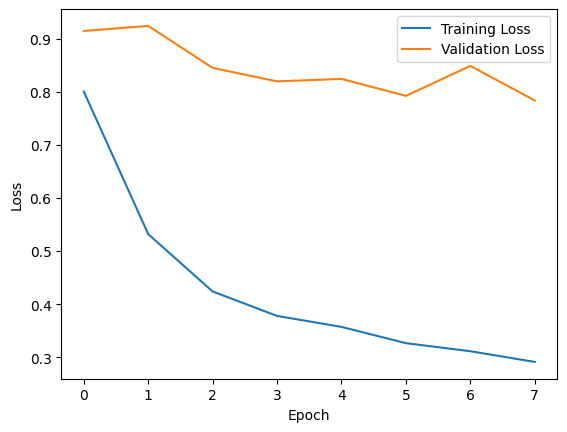

In [10]:
# plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


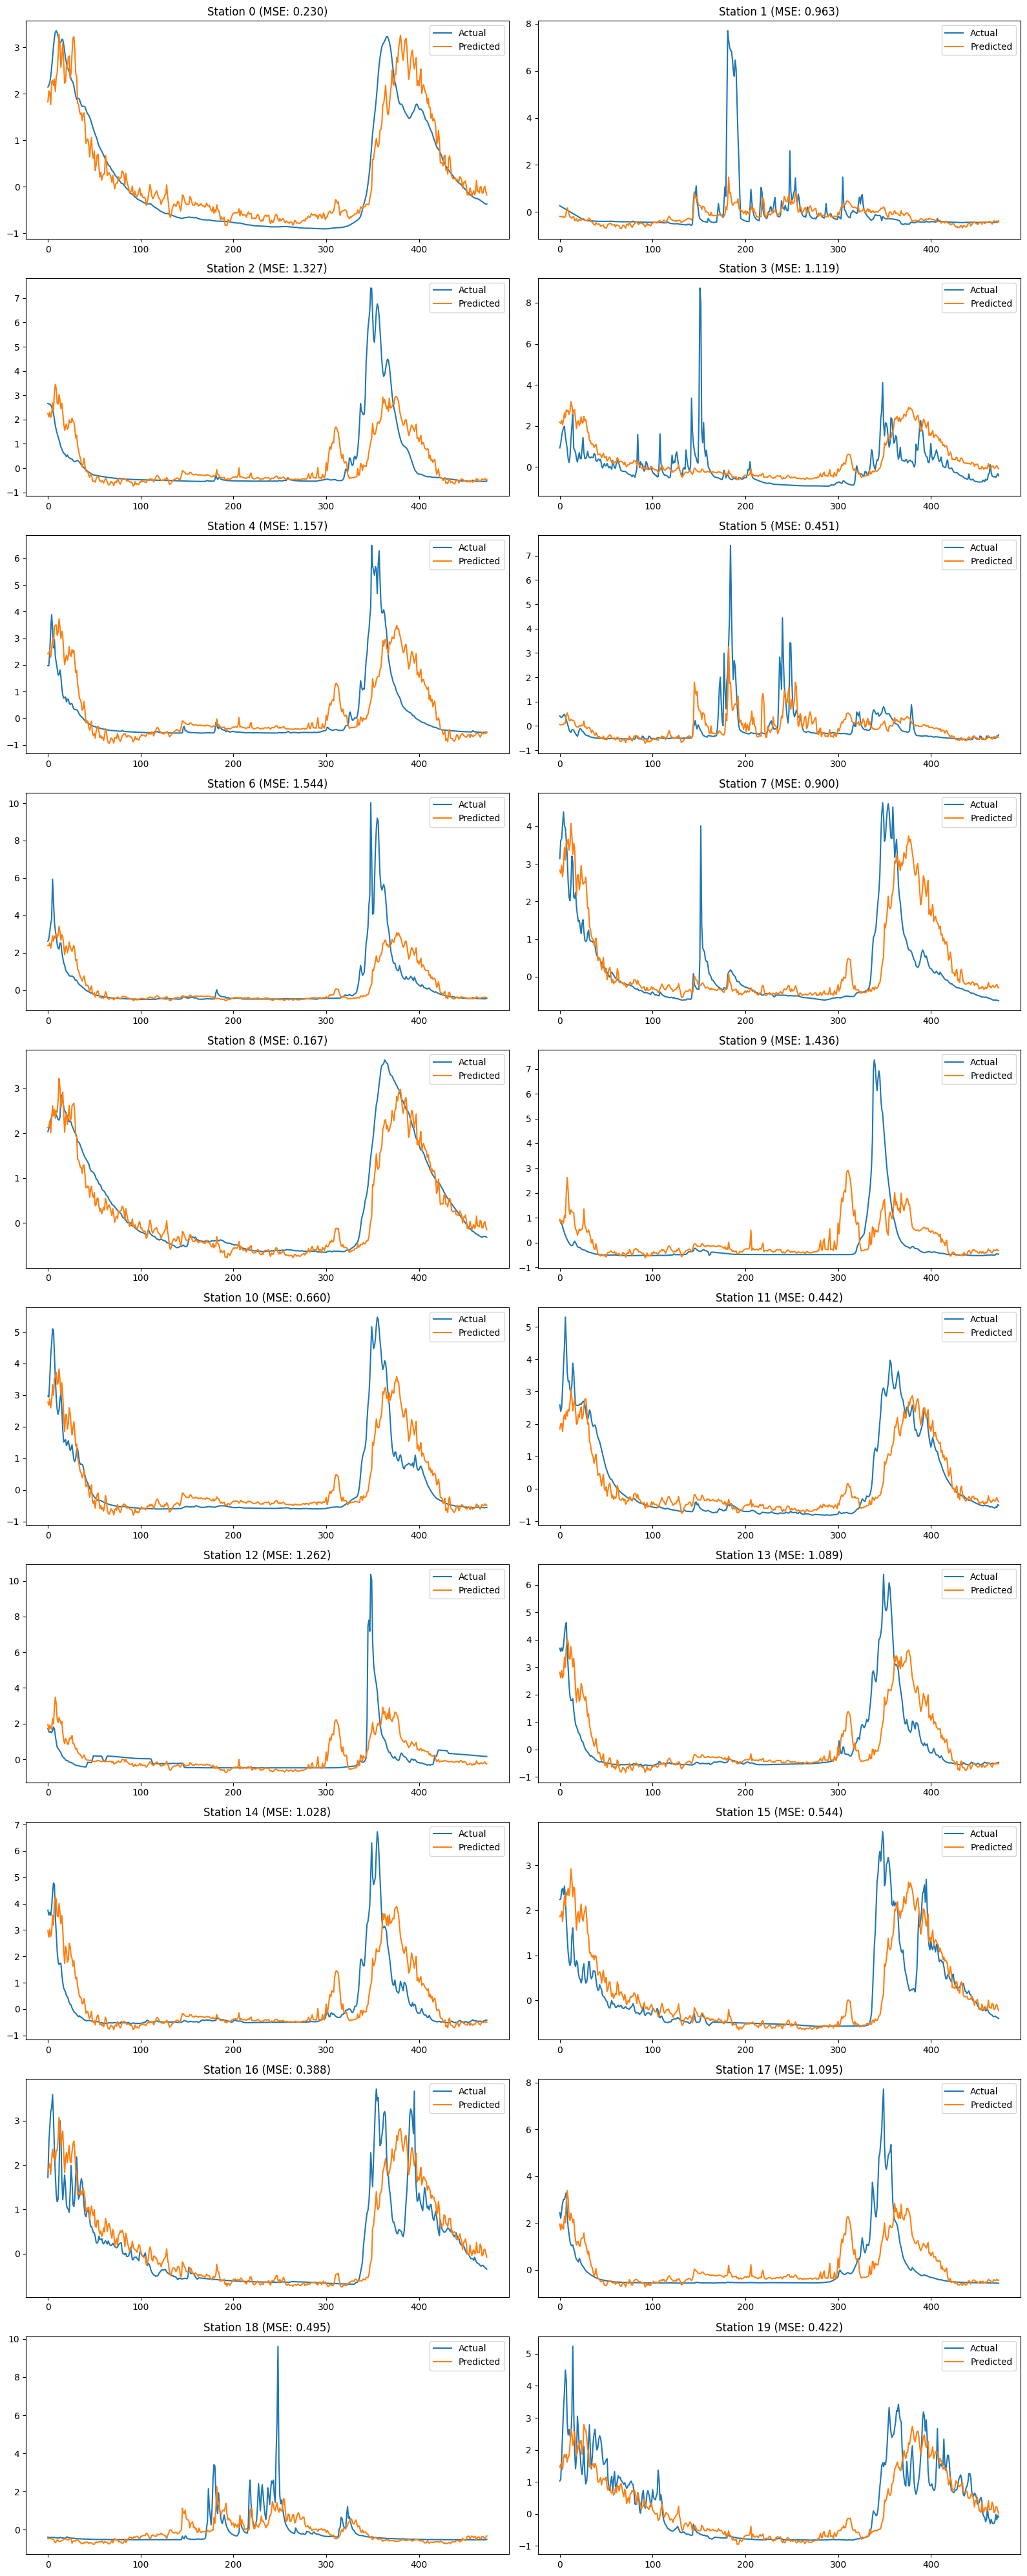

In [16]:
# plot the model predictions for the first 20 stations using subplots
n_plot = 20

predictions = model.predict(x_val)

fig, axs = plt.subplots(n_plot // 2, 2, figsize=(16, n_plot * 2))
for i in range(n_plot):
    mse = np.mean((y_val[:, i] - predictions[:, i]) ** 2)
    station = i
    ax = axs[i // 2, i % 2]
    ax.plot(y_val[:, station], label='Actual')
    ax.plot(predictions[:, station], label='Predicted')
    ax.set_title(f"Station {station} (MSE: {mse:.3f})")
    ax.legend()
plt.tight_layout()
plt.show()

In [19]:
def calculate_nse(y_true, y_pred):
    """
    Compute the Nash-Sutcliffe Efficiency (NSE).
    Args:
        y_true: Array of true values (observations).
        y_pred: Array of predicted values.
    Returns:
        NSE value.
    """
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    nse = 1 - numerator / denominator
    return nse

station_nse = [calculate_nse(y_val[:, i], predictions[:, i]) for i in range(y_val.shape[1])]
nse_score = calculate_nse(y_val, predictions)
print(f"NSE: {nse_score:.4f}")
print(f"Mean NSE: {np.mean(station_nse):.4f}")

NSE: 0.4340
Mean NSE: 0.4107
